In [ ]:
# Import Required Libraries
import os
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
import numpy as np
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout, Flatten  # Import Flatten
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [ ]:
# Mount Google Drive:
from google.colab import drive
drive.mount('/content/drive')

# Copy & Extract Dataset from Google Drive (if needed)
# (Assuming the dataset zip file has been copied as shown in your previous code.)
!cp '/content/drive/MyDrive/dogs-vs-cats-vvsmall.zip' /content/dogs-vs-cats-vvsmall.zip
print("Dataset copied successfully!")

local_zip = '/content/dogs-vs-cats-vvsmall.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
print("Data extracted successfully!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset copied successfully!
Data extracted successfully!


In [ ]:
base_dir = '/tmp/dogs-vs-cats-vvsmall'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cat_dir = os.path.join(train_dir, 'cats')

train_dog_dir = os.path.join(train_dir, 'dogs')

validation_cat_dir = os.path.join(validation_dir, 'cats')

validation_dog_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
train_cat_names = os.listdir(train_cat_dir)
print(train_cat_names[:10])

train_dog_names = os.listdir(train_dog_dir)
print(train_dog_names[:10])

validation_cat_names = os.listdir(validation_cat_dir)
print(validation_cat_names[:10])

validation_dog_names = os.listdir(validation_dog_dir)
print(validation_dog_names[:10])

['cat.463.jpg', 'cat.546.jpg', 'cat.181.jpg', 'cat.2481.jpg', 'cat.2334.jpg', 'cat.951.jpg', 'cat.1298.jpg', 'cat.784.jpg', 'cat.2610.jpg', 'cat.810.jpg']
['dog.2801.jpg', 'dog.2547.jpg', 'dog.964.jpg', 'dog.323.jpg', 'dog.1632.jpg', 'dog.1390.jpg', 'dog.1708.jpg', 'dog.2593.jpg', 'dog.475.jpg', 'dog.2227.jpg']
['cat.9308.jpg', 'cat.9154.jpg', 'cat.8770.jpg', 'cat.8542.jpg', 'cat.8951.jpg', 'cat.9396.jpg', 'cat.8517.jpg', 'cat.8764.jpg', 'cat.9310.jpg', 'cat.8780.jpg']
['dog.9075.jpg', 'dog.8663.jpg', 'dog.9176.jpg', 'dog.8602.jpg', 'dog.8655.jpg', 'dog.9019.jpg', 'dog.9311.jpg', 'dog.9192.jpg', 'dog.8866.jpg', 'dog.8563.jpg']


In [ ]:
# print out the number of images in the directories
print('total training cat images:', len(os.listdir(train_cat_dir)))
print('total training dog images:', len(os.listdir(train_dog_dir)))
print('total validation cat images:', len(os.listdir(validation_cat_dir)))
print('total validation dog images:', len(os.listdir(validation_dog_dir)))

total training cat images: 3000
total training dog images: 3000
total validation cat images: 900
total validation dog images: 900


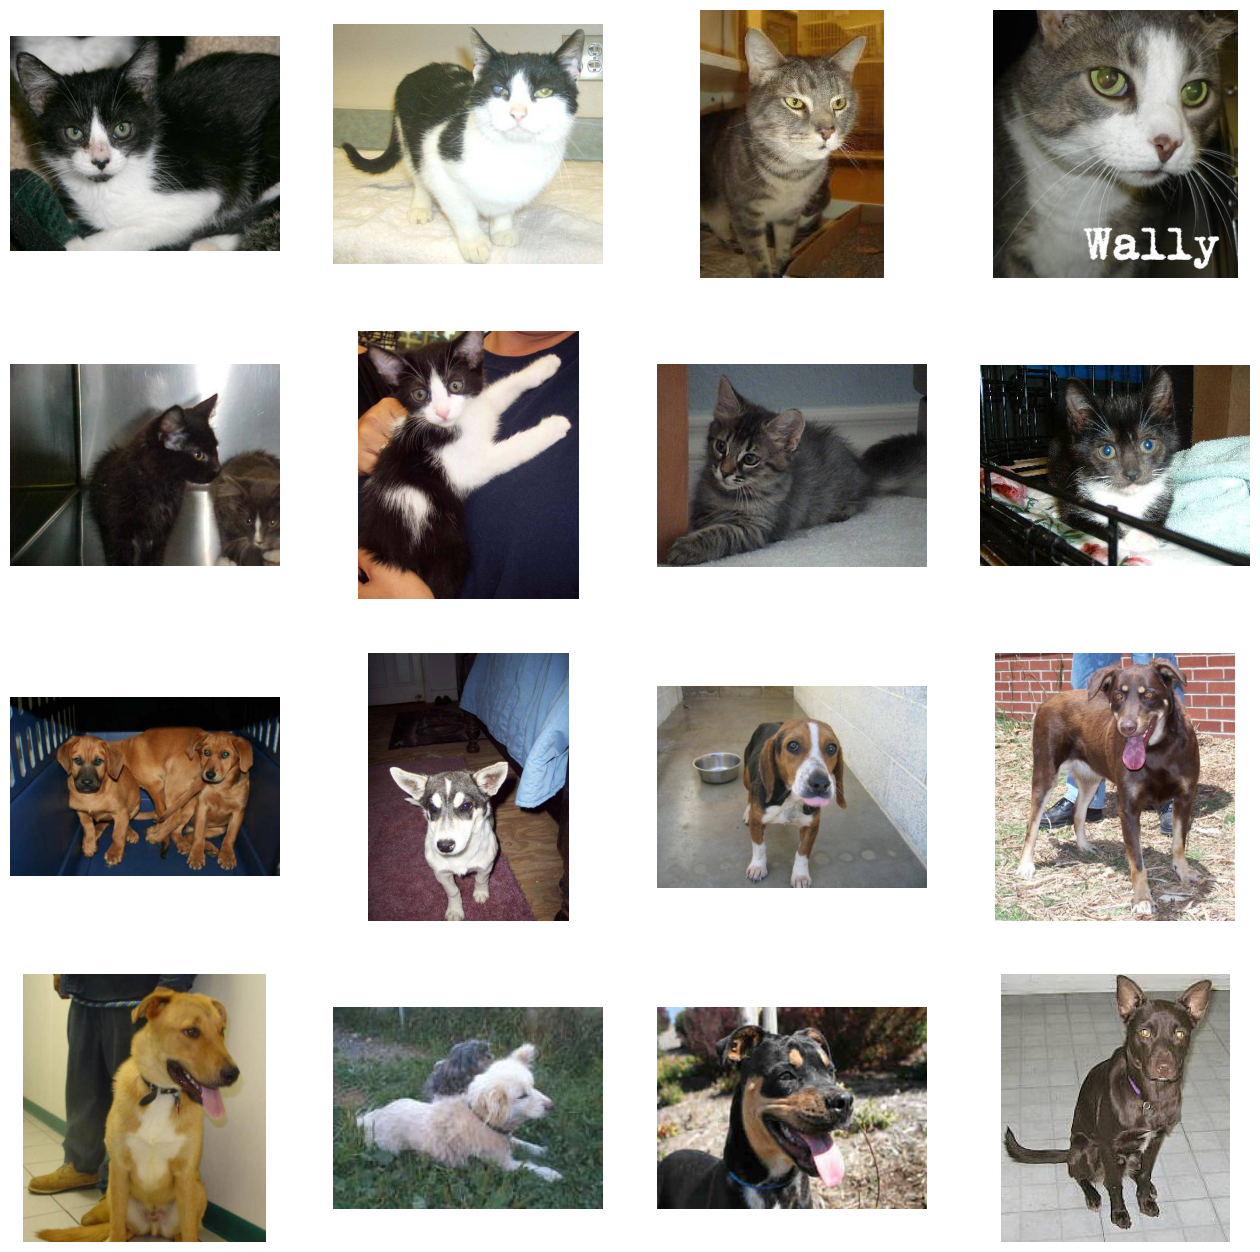

In [ ]:
# display images from the dataset
nrows = 4
ncols = 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
# pick the first 8 horse pictures
#[print(e) for e in myList]
# for e in myList:
#    print(e)
next_cat_pix = [os.path.join(train_cat_dir, fname) for fname in train_cat_names[pic_index-8:pic_index]]

# pick the first 8 human pictures
next_dog_pix = [os.path.join(train_dog_dir, fname)
                for fname in train_dog_names[pic_index-8:pic_index]]

# add the horse and human pictures together in a list and plot in
# the specified number of rows and columns
for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
      '/tmp/dogs-vs-cats-vvsmall/train/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 32 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/dogs-vs-cats-vvsmall/validation/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 6000 images belonging to 2 classes.
Found 1800 images belonging to 2 classes.


In [ ]:
# Clear the current Keras session
#tf.keras.backend.clear_session()

In [ ]:
# 5. Data Augmentation with ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


val_datagen = ImageDataGenerator(
    rescale=1./255
)

# Create generators using the dogs vs. cats directories and our IMG_SIZE
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 6000 images belonging to 2 classes.
Found 1800 images belonging to 2 classes.


In [ ]:
# Build the Transfer Learning Model with MobileNetV2
# Load MobileNetV2 base (without top layers)
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)
)
base_model.trainable = False  # Freeze the base model


# Create a Sequential model
model = Sequential()
# Add the base model (without its top classification layer)
model.add(base_model)
# Add the flattening layer to convert the output to a 1D vector
model.add(Flatten())
# Add a fully connected layer with 512 units and ReLU activation
#model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(1e-4)))
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(1e-4)))
model.add(BatchNormalization())
model.add(Dropout(0.3))  # Dropout with rate=0.3
# Output layer with a single unit and sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Define the complete model
#transfer_model = Model(inputs=base_model.input, outputs=predictions)
#transfer_model.summary()
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 62720)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      32,113,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,373,697 (131.13 MB)

 Trainable params: 32,114,689 (122.51 MB)

 Non-trainable params: 2,259,008 (8.62 MB)

In [ ]:
# 7. Compile the Model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# 8. Add Callbacks
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    verbose=1,
    min_lr=1e-6
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [ ]:
# 9. Train the Model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    #epochs=EPOCHS,
    epochs=10,
    #callbacks=[reduce_lr, early_stop],
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 78s 375ms/step - accuracy: 0.9407 - loss: 0.3011 - val_accuracy: 0.9750 - val_loss: 0.2150
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 64s 340ms/step - accuracy: 0.9595 - loss: 0.2193 - val_accuracy: 0.9772 - val_loss: 0.1708
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 65s 346ms/step - accuracy: 0.9661 - loss: 0.1980 - val_accuracy: 0.9750 - val_loss: 0.1702
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 65s 344ms/step - accuracy: 0.9771 - loss: 0.1594 - val_accuracy: 0.9772 - val_loss: 0.1614
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 65s 346ms/step - accuracy: 0.9719 - loss: 0.1687 - val_accuracy: 0.9772 - val_loss: 0.1633
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 64s 338ms/step - accuracy: 0.9766 - loss: 0.1492 - val_accuracy: 0.9761 - val_loss: 0.1620
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 63s 336ms/step - accuracy: 0.9727 - loss: 0.1647 - val_accuracy: 0.9744 - val_loss: 0.1686
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 63s 336ms/step - accuracy: 0.9729 - loss: 0

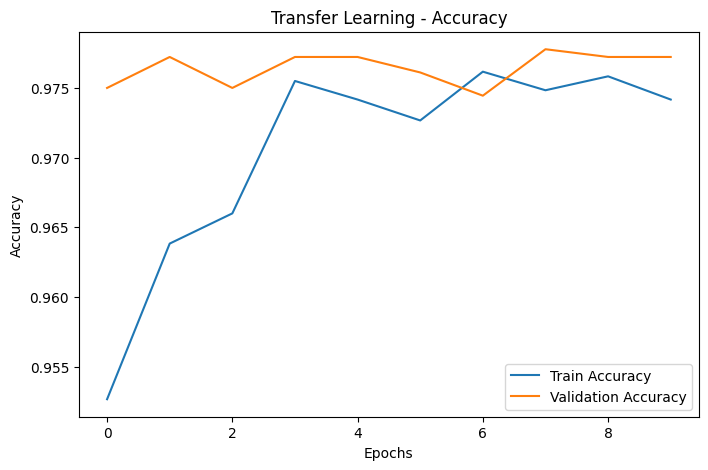

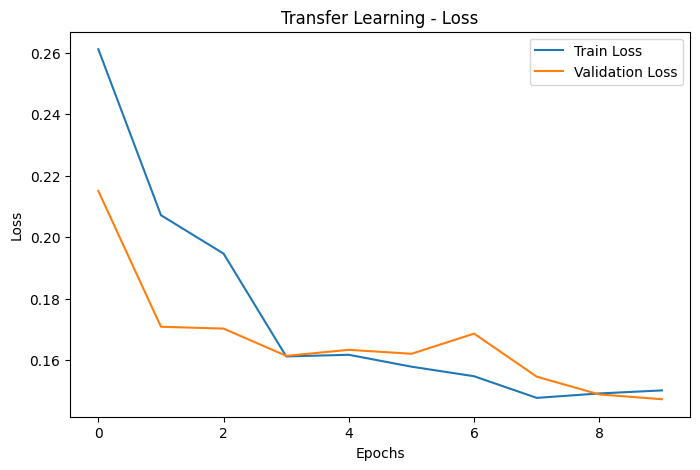

In [ ]:
# 10. Plot Training Curves
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()